In [151]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl , plt

In [152]:
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline


In [153]:
raw=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/%5ENSEI.csv', parse_dates=True)
data= (pd.DataFrame(raw).dropna())
Period=40

In [154]:
data['Typical_Price']=data['High']+data['Close']+data['Low']/3
data['MA']=data['Typical_Price'].rolling(Period).mean()
data['Deviation']=np.abs(data['Typical_Price']-data['MA'])
data['Mean_deviation']=data['Deviation'].rolling(Period).mean()
data['CCI']=(data['Typical_Price']-data['MA'])/(0.015*data['Mean_deviation'])
data.dropna(inplace=True)

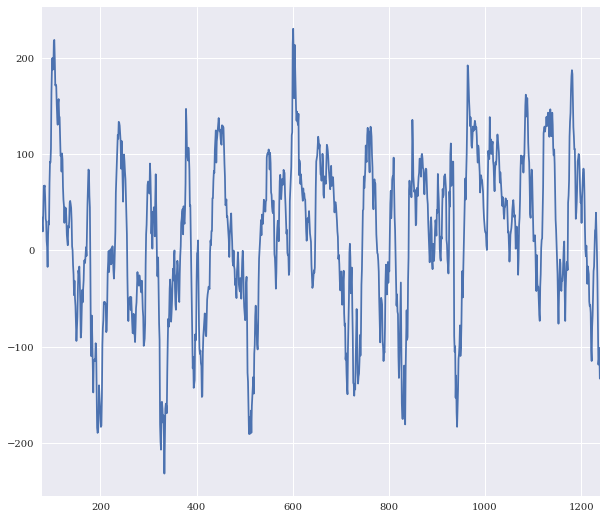

In [155]:
data['CCI'].plot(figsize=(10,9))

In [156]:
data['Position']=0
N=data['Date'].count()
data.reset_index(drop=True, inplace=True)
i=0;
while i<N:
    if data.loc[i,'CCI']<=-100 and i<N:
        data.loc[i,'Position']=-1;
        i+=1;
        while i<1144:
            if data.loc[i,'CCI']>=100 and i<N:
                i+=1;
                break;
            data.loc[i,'Position']=-1;
            i+=1;
    i+=1;
i=0;
while i<N:
    if data.loc[i,'Position']==0:
        data.loc[i,'Position']=1;
    i+=1;    


In [157]:
data2=data[['Date','Position','Typical_Price']]
data2

,Date,Position,Typical_Price
0,2010-08-13,1,12733.766765
1,2010-08-16,1,12682.683106
2,2010-08-17,1,12660.632975
3,2010-08-18,1,12772.516764
4,2010-08-19,1,12910.933756
5,2010-08-20,1,12915.033366
6,2010-08-23,1,12933.099772
7,2010-08-24,1,12881.833496
8,2010-08-25,1,12786.016602
9,2010-08-26,1,12782.683105


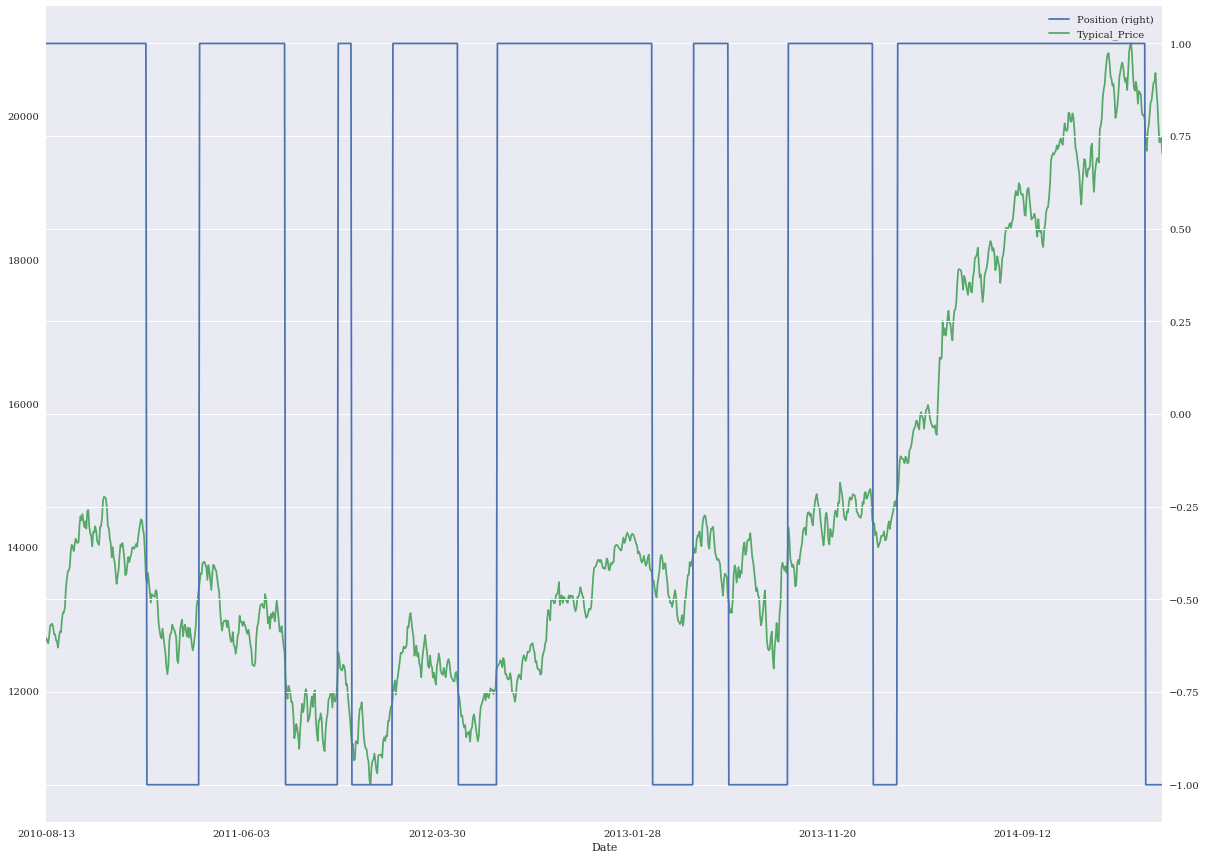

In [158]:
ax=data2.plot(x='Date',secondary_y='Position', figsize=(20,15))

# $ Net-Returns$ $Calculation $

In [159]:
N=data['Date'].count()
m=0;
while m<N:
        if data.loc[m,'Position']==1: 
            k=1;j=m;
            while k is not 0:
                if data.loc[j,'Position']==-1 and j<N:
                    data.loc[j,'gain']=data.loc[j,'Close']-data.loc[m,'Close'];
                    k=0;
                    break;
                elif j==N-1:
                    k=0;
                    break;
                j+=1;
        m+=1;
p=0;
success_trade=0;
while p<N:
    if data.loc[p,'gain']>0:
        success_trade+=1;
        p+=1;
        break;
    p+=1;               
                

In [160]:
total = data['gain'].count();
total

8

In [161]:
success_trade

1

In [162]:
Hit_ratio = success_trade/total;
Hit_ratio

0.125

In [163]:
net_return=data['gain'].sum()
net_return



-638.198730000001

# $$Vectorized$$ $$Back-Testing$$

In [164]:
data['Returns']=np.log(data['Typical_Price']/data['Typical_Price'].shift(1))
data['Strategy']= data['Position'].shift(1)*data['Returns']

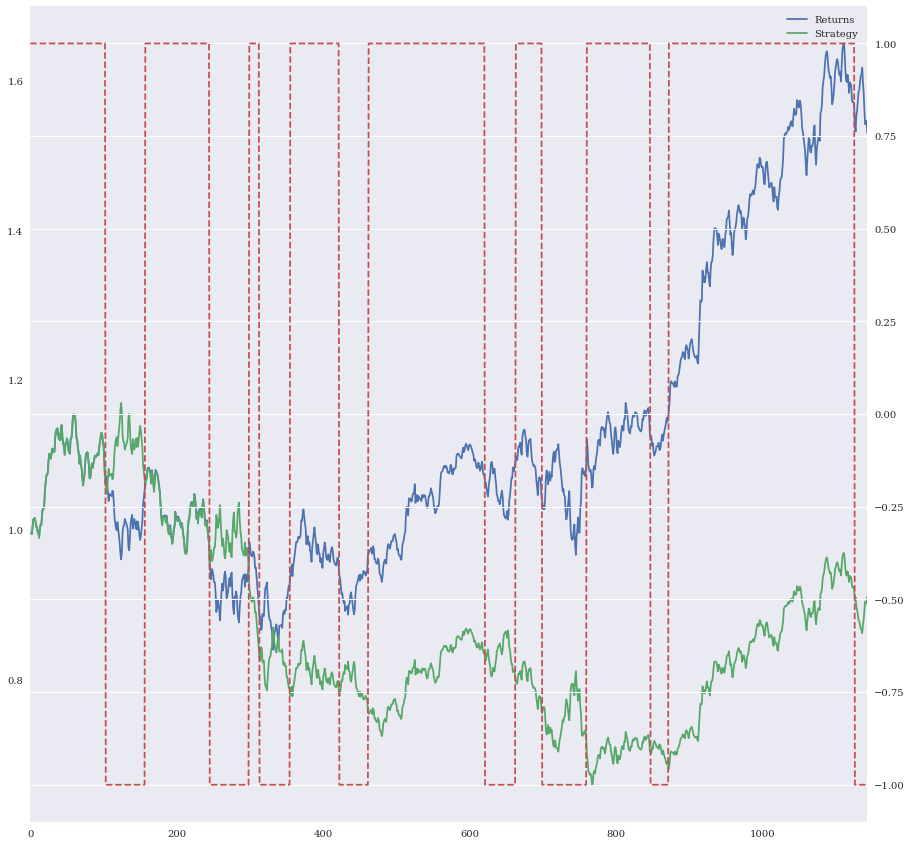

In [165]:
ax=data[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(15,15))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')

In [166]:
np.exp(data[['Returns','Strategy']].sum())

Returns     1.529503
Strategy    0.911474
dtype: float64

On an Average this strategy is not good enough to even fetch benefits from returns than just holding the stock